In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random as rd





def seed_photons(array_lenght,min_ph,max_ph):
    arr = np.zeros(array_lenght)
    for i in range(len(arr)):
        arr[i]=rd.random()

    n_photons = rd.randint(min_ph,max_ph)

    for i in range(n_photons):
        Phot_position= rd.randint(1,round(array_lenght/2))
        arr[Phot_position]= (rd.random() + rd.randint(100,400))
    
    return(arr,n_photons)



In [ ]:
(arr,n) = seed_photons(129,2,2)
x = np.linspace(0,128,129)
plt.plot(x,arr)

In [ ]:
def low_pass_filter(array,tau):
    arr1 = np.zeros(len(arr))

    accu = array[0]

    for i in range(0,len(array)):
        b = tau#(1-np.exp(-tau))
        accu = (accu + b*(arr[i]-accu))
        arr1[i]=accu

    plt.plot(x,arr1)
    return arr1
    

In [ ]:
new_arr = low_pass_filter(arr,0.5)
#print(new_arr)

In [ ]:
final= low_pass_filter(new_arr,0.05)

#plt.plot(x,final)

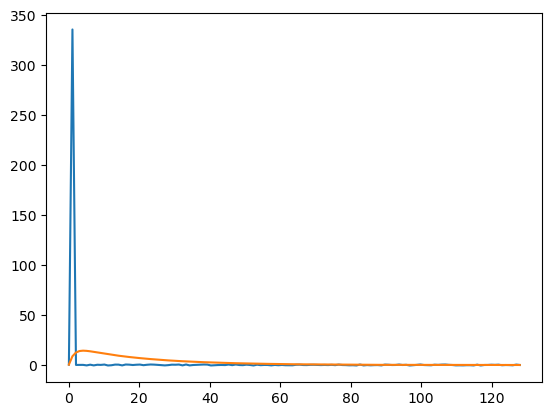

In [2]:
coeff = [0.5, 0.05]
npts=128
x=np.linspace(0,npts,npts)
(ph,n) = seed_photons(npts,1,1)

plt.plot(x,ph)
def adc_filter(ph,coeff):
    for j in range(2):
        accu = ph[0]
        for i in range(npts):
            accu = accu+ (coeff[j]*(ph[i] - accu))
            ph[i] = accu
    return ph

ph = adc_filter(ph,coeff)

plt.plot(x,ph)

In [ ]:
import scipy.signal as sc
from mpl_interactions import ioff, panhandler, zoom_factory
%matplotlib widget
npts=256
x=np.linspace(0,npts,npts)
(ph,n) = seed_photons(npts,1,1)
c = np.array([0.5,0.05])

M = np.ndarray(shape=(10,6))
#plt.plot(x,ph,label='pulse')
with plt.ioff():
    figure, axis = plt.subplots()

for i in range(1,11):
    c_1 =[0,0]
    c_1[0] = c[0]
    c_1[1]=c[1]*i

    signal = adc_filter(ph,c_1)
    plt.plot(x,ph,linewidth=1,label=('b2= '+str('{0:.3g}'.format(0.5*i))),)

    (peak_index, props) = sc.find_peaks(signal,height=2,width=2)
    j = peak_index
    while j> peak_index-1:
        if signal[j]<1:
            t_descent=j-peak_index
            break
        j=j+1
    j = peak_index
    while j< peak_index+1:
        if signal[j]<1:
            t_rise=abs(j-peak_index)
            break
        j=j-1

    M[i-1,0]=round(c_1[1],3)
    M[i-1,1]=props['peak_heights']
    M[i-1,2]=props['widths']
    M[i-1,3]=peak_index
    M[i-1,4]=t_descent
    M[i-1,5] =t_rise




plt.legend()
disconnect_zoom = zoom_factory(axis)
pan_handler = panhandler(figure)
display(figure.canvas)
print(M)

In [ ]:
plt.figure()
species = M[:, 0]
penguin_means = {
    't_rise': M[:, 5],
    't_fall': M[:, 4],
    'peak_width': M[:, 2],
    'peak_height': M[:, 1],  # This will be plotted on the secondary y-axis
}

x = np.arange(len(species))  # the label locations
bar_width = 0.2  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

# Primary y-axis for all attributes except 'peak_height'
for attribute, measurement in penguin_means.items():
    if attribute != 'peak_height':  # Plot only t_rise, t_fall, and peak_width here
        offset = bar_width * multiplier
        rects = ax.bar(x + offset, measurement, bar_width, label=attribute)
        multiplier += 1

# Secondary y-axis for 'peak_height'
ax2 = ax.twinx()
offset = bar_width * multiplier
rects = ax2.bar(x + offset, penguin_means['peak_height'], bar_width, color='purple', label='peak_height')

# Set y-axis labels
ax.set_xlabel('b2 coefficient')
ax.set_ylabel('time (arb units)')
ax2.set_ylabel('Intensity (peak height) (arb units)')

# Setting x-axis and title
ax.set_title('Measurement Comparison for different b2 coeffs')
ax.set_xticks(x + bar_width * (len(penguin_means) - 1) / 2, species)

# Display legends for both axes
fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9), ncols=4)

# Set limits as needed
ax.set_ylim(0, 90)
ax2.set_ylim(0, max(penguin_means['peak_height']) + 10)  # Adjust this limit based on peak height

plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


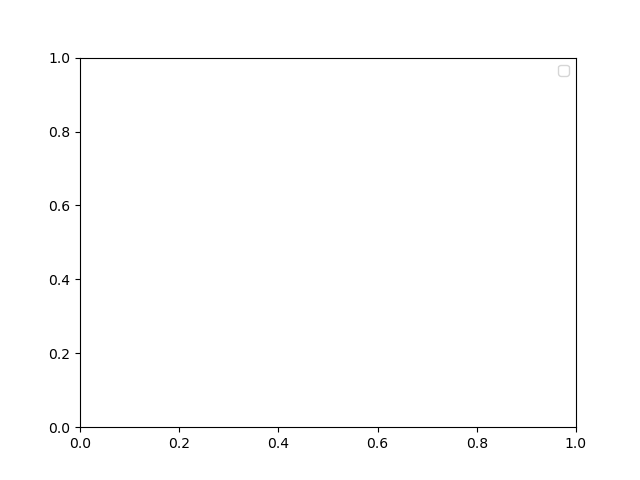

/var/folders/tg/93p_t0m14wj5vy6rvz3cljjh0000gn/T/ipykernel_12140/3608692432.py:31: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  while j>=peak_index:
/var/folders/tg/93p_t0m14wj5vy6rvz3cljjh0000gn/T/ipykernel_12140/3608692432.py:39: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  while j< peak_index+1:


[52]
[3.52361397]
[81]
[2.59608052]
[106]
[2.24103581]
[129]
[2.02748001]
[]
[]


ValueError: setting an array element with a sequence.

In [3]:
import scipy.signal as sc
from mpl_interactions import ioff, panhandler, zoom_factory
%matplotlib widget
npts=256
x=np.linspace(0,npts,npts)
(ph,n) = seed_photons(npts,1,1)
c = np.array([0.05,0.05])

M = np.ndarray(shape=(10,6))
#plt.plot(x,ph,label='pulse')
with plt.ioff():
    figure, axis = plt.subplots()

plt.legend()
disconnect_zoom = zoom_factory(axis)
pan_handler = panhandler(figure)
display(figure.canvas)

for i in range(1,11):
    c_1 =[0,0]
    c_1[1] = c[1]
    c_1[0]=c[0]*i

    signal = adc_filter(ph,c_1)
    plt.plot(x,ph,linewidth=1,label=('b2= '+str('{0:.3g}'.format(0.05*i))),)

    (peak_index, props) = sc.find_peaks(signal,height=2,width=2)
    j = peak_index
    print(peak_index)
    print(props['peak_heights'])
    while j>=peak_index:
        if j == 256:
            break
        elif signal[j]<1:
            t_descent=j-peak_index
            break
        j=j+1
    j = peak_index
    while j< peak_index+1:
        if signal[j]<1:
            t_rise=abs(j-peak_index)
            break
        j=j-1

    M[i-1,0]=round(c_1[0],3)
    M[i-1,1]=props['peak_heights']
    M[i-1,2]=props['widths']
    M[i-1,3]=peak_index
    M[i-1,4]=t_descent
    M[i-1,5] =t_rise





print(M)